In [47]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

In [68]:
eleccap_on_grid = pd.read_csv(
    "../data/irena/ELECCAP_20211218-095028_on_grid.csv",
    encoding="latin-1", skiprows=2
).drop(columns=["Grid connection"])
eleccap_on_grid["Installed electricity capacity by country/area (MW)"] = pd.to_numeric(
    eleccap_on_grid["Installed electricity capacity by country/area (MW)"], errors="coerce"
)
eleccap_on_grid

,Country/area,Technology,Year,Installed electricity capacity by country/area (MW)
0,Afghanistan,On-grid Solar photovoltaic,2000,NaN
1,Afghanistan,On-grid Solar photovoltaic,2001,NaN
2,Afghanistan,On-grid Solar photovoltaic,2002,NaN
3,Afghanistan,On-grid Solar photovoltaic,2003,NaN
4,Afghanistan,On-grid Solar photovoltaic,2004,NaN
...,...,...,...,...
97897,Zimbabwe,Other non-renewable energy,2016,NaN
97898,Zimbabwe,Other non-renewable energy,2017,NaN
97899,Zimbabwe,Other non-renewable energy,2018,NaN
97900,Zimbabwe,Other non-renewable energy,2019,NaN


In [69]:
eleccap_on_grid["Technology"].unique()

array(['On-grid Solar photovoltaic', 'Off-grid Solar photovoltaic',
       'Concentrated solar power', 'Onshore wind energy',
       'Offshore wind energy', 'Renewable hydropower',
       'Mixed Hydro Plants', 'Pumped storage', 'Solid biofuels',
       'Renewable municipal waste', 'Liquid biofuels', 'Biogas',
       'Geothermal energy', 'Marine energy', 'Fossil fuels',
       'Coal and peat', 'Oil', 'Natural gas', 'Nuclear',
       'Fossil fuels n.e.s.', 'Other non-renewable energy'], dtype=object)

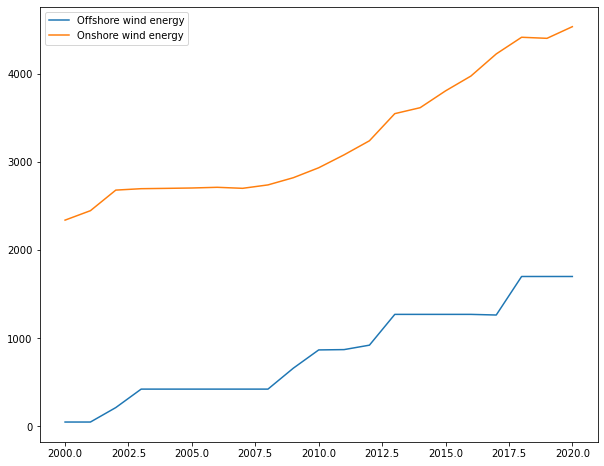

In [70]:
wind_mask = (eleccap_on_grid["Technology"] == "Onshore wind energy") | (eleccap_on_grid["Technology"] == "Offshore wind energy")
eleccap_on_grid_wind = eleccap_on_grid[wind_mask]

fig, ax = plt.subplots(1)
for key, group in eleccap_on_grid_wind[eleccap_on_grid_wind["Country/area"] == "Denmark"].groupby("Technology"):
    ax.plot(group["Year"], group["Installed electricity capacity by country/area (MW)"], label=f"{key}")
    
plt.legend(loc="best")
plt.show()

In [72]:
onshore_wind_2020 = eleccap_on_grid_wind[(eleccap_on_grid_wind["Year"] == 2020) &
                                         (eleccap_on_grid_wind["Technology"] == "Onshore wind energy") &
                                         (eleccap_on_grid_wind["Installed electricity capacity by country/area (MW)"] > 0)]
onshore_wind_2020

,Country/area,Technology,Year,Installed electricity capacity by country/area (MW)
83,Afghanistan,Onshore wind energy,2020,0.30
3170,Antigua and Barbuda,Onshore wind energy,2020,4.00
3611,Argentina,Onshore wind energy,2020,2623.10
4052,Armenia,Onshore wind energy,2020,2.93
4493,Aruba,Onshore wind energy,2020,30.00
...,...,...,...,...
93575,United States of America,Onshore wind energy,2020,117714.80
94457,Uruguay,Onshore wind energy,2020,1506.56
94898,Uzbekistan,Onshore wind energy,2020,0.75
95339,Vanuatu,Onshore wind energy,2020,3.40
